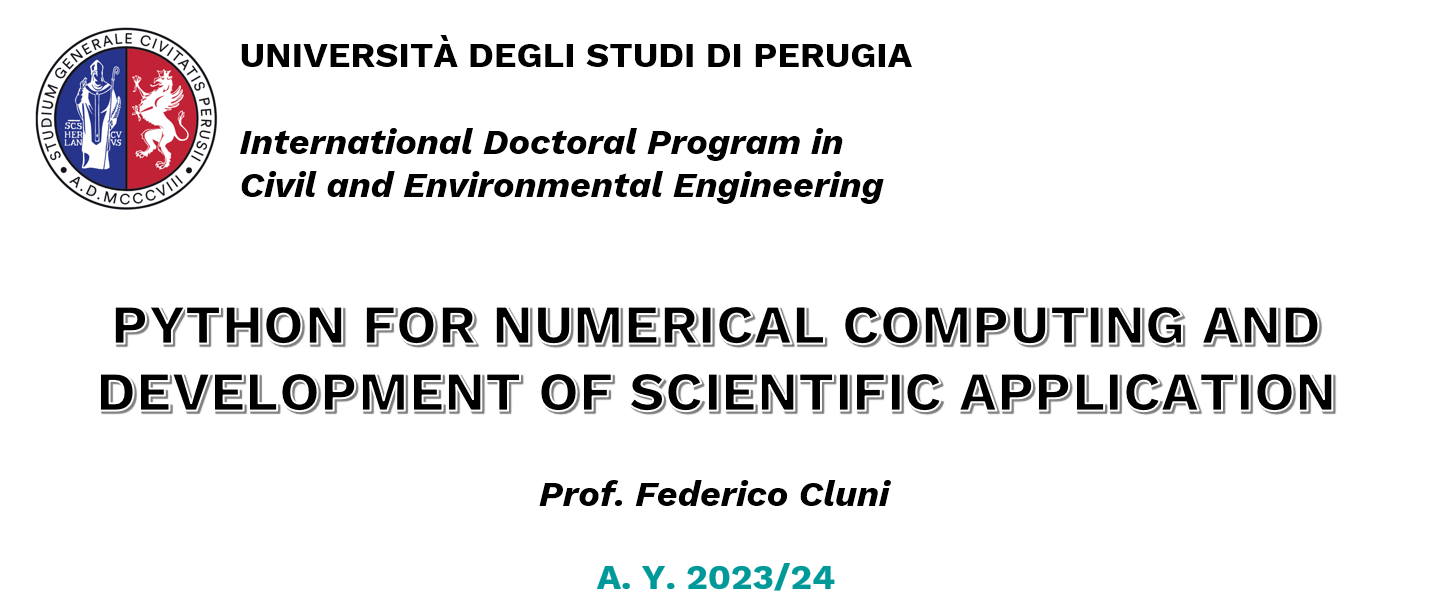

# Lesson #6 - March 25th, 2024
<hr>

The examples are adapted from:

R. Johansson, "Numerical Python: Scientific Computing and Data Science Applications With Numpy, Scipy and Matplotlib", Apress, 2018

In [1]:
import numpy as np
import numpy.linalg
import numpy.random as rd
import scipy
from scipy import linalg, optimize, integrate, fft
import matplotlib
import matplotlib.pyplot as plt

# Solution of linear systems

Solve the system of linear equations

$$\left\{ \begin{array}{l} 2x_0 +3x_1 = -4 \\
-x_0 +4x_1 = 2 \end{array}\right.$$

In a matrix form, set

$$A =\left[ \begin{array}{cc} 2 & 3 \\ -1 & 4 \end{array} \right], b =\left[ \begin{array}{c} -4 \\ 2 \end{array} \right]$$

and find

$$ x =\left[ \begin{array}{cc} x_1 \\ x_2 \end{array} \right]$$

so that

$$Ax = b$$

In [2]:
A = np.array([[2,3],[-1,4]])
A

array([[ 2,  3],
       [-1,  4]])

In [3]:
b = np.array([-4,2])
b

array([-4,  2])

In [4]:
x = linalg.solve(A,b)
x

array([-2.,  0.])

Check that $x$ is indeed the solution

In [5]:
A@x - b

array([0., 0.])

In [8]:
linalg.inv(A)@b

array([-2.,  0.])

## Condition number

The condition number should as small (i.e. close to $1$) as possible, otherwise small changes in $b$ results in large variation in $x$.
If it is small, the system is *well conditionated*.

In [9]:
numpy.linalg.cond(A)

2.2907308206532337

What happens if c.n. is large?

In [11]:
linalg.solve(A,np.array([-4,2.01]))

array([-2.00272727e+00,  1.81818182e-03])

In [12]:
A1 = np.array([[2,3],[4,5.9999]])
numpy.linalg.cond(A1)

324994.0000483156

In [13]:
linalg.solve(A1,[2,4])

array([1., 0.])

In [14]:
linalg.solve(A1,[2.01,4])

array([-298.995,  200.   ])

## Norm, rank

In [15]:
numpy.linalg.norm(A)

5.477225575051661

In [17]:
%pdoc numpy.linalg.norm

Class docstring:
    Matrix or vector norm.
    
    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.
    
    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
        is None. If both `axis` and `ord` are None, the 2-norm of
        ``x.ravel`` will be returned.
    ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object. The default is None.
    axis : {None, int, 2-tuple of ints}, optional.
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it specifies the
        axes that hold 2-D matrices, and the matrix norms of these matrices
        are computed.  If `axis` is None then either a vector nor

In [18]:
numpy.linalg.matrix_rank(A)n

2

In [19]:
numpy.linalg.det(A)

11.000000000000002

# Eigenvalue problem

In several fields (mechanics, 3D vision, ...) it is necessary to solve the following problem:

Given a matrix $A$, find value of a scalar $\lambda$ and a vector $v$ so that

$$ A \, v = \lambda \, v$$

Usually, the solution is not unique, and the correpsonding pair $\lambda$ and $v$ are called eigenvalue and eigenvectors, respectively.

In [20]:
A = np.array([[4.,-3.,0.],[3.,4.,0],[5.,10.,10.]])
print(A)
L, V = linalg.eig(A)
print(L)
print(V)
for i in range(A.shape[0]):
    print(f"\u03bb = {L[i]:16.3f}, [ {V[0,i]:18.5f}, {V[1,i]:18.5f}, {V[2,i]:18.5f}]")

[[ 4. -3.  0.]
 [ 3.  4.  0.]
 [ 5. 10. 10.]]
[10.+0.j  4.+3.j  4.-3.j]
[[ 0.        +0.j          0.36599657+0.27449743j  0.36599657-0.27449743j]
 [ 0.        +0.j          0.27449743-0.36599657j  0.27449743+0.36599657j]
 [ 1.        +0.j         -0.76249285+0.j         -0.76249285-0.j        ]]
λ =    10.000+0.000j, [   0.00000+0.00000j,   0.00000+0.00000j,   1.00000+0.00000j]
λ =     4.000+3.000j, [   0.36600+0.27450j,   0.27450-0.36600j,  -0.76249+0.00000j]
λ =     4.000-3.000j, [   0.36600-0.27450j,   0.27450+0.36600j,  -0.76249-0.00000j]


In [21]:
A@(4*V[:,0])-L[0]*(4*V[:,0])

array([0.+0.j, 0.+0.j, 0.+0.j])

Note that `L` is an array and `V` is a matrix whose *columns* are the eigenvectors.

A different case

In [23]:
A = np.array([[100.,-30.,0.],[-30.,-200.,0.],[0.,0.,50.]])
print(A)
L, V = linalg.eig(A)
for i in range(A.shape[0]):
    print(f"\u03bb = {L[i]:16.3f}, [ {V[0,i]:8.5f}, {V[1,i]:8.5f}, {V[2,i]:8.5f}]")

[[ 100.  -30.    0.]
 [ -30. -200.    0.]
 [   0.    0.   50.]]
λ =   102.971+0.000j, [  0.99513, -0.09854,  0.00000]
λ =  -202.971+0.000j, [  0.09854,  0.99513,  0.00000]
λ =    50.000+0.000j, [  0.00000,  0.00000,  1.00000]


Note that when the matrix is symmetric with real entries (and so it is Hermitian) the eigenvalues and corresponding eigenvector are real, so `eigh` can be used 

In [24]:
L, V = linalg.eigh(A)
for i in range(A.shape[0]):
    print(f"\u03bb = {L[i]:8.3f}, [ {V[0,i]:8.5f}, {V[1,i]:8.5f}, {V[2,i]:8.5f}]")

λ = -202.971, [  0.09854,  0.99513,  0.00000]
λ =   50.000, [  0.00000,  0.00000,  1.00000]
λ =  102.971, [  0.99513, -0.09854,  0.00000]


# Fast Fourier Transform (FFT)

One of the fundamental tool in signal processing is the *Fast Fourier transform* (FFT).

Givel a sample $x_k$ with $k = 0, 1, \ldots N-1$ than its FFT is 

$ X_k = \sum_{j=0}^{N-1} x_j e^{-2\pi i \frac{kj}{N}}$

Once $F_k$ are known, it is possible to go back to the original sample with the *inverse* FFT (iFFT) as

$ x_k = \sum_{j=0}^{N-1} X_j e^{2\pi i \frac{kj}{N}}$


In [25]:
dt = 0.01
f_Ny = 1/dt/2

T = 3
t = np.arange(0,T,dt)
N = len(t)

#fi = rd.rand(3)*f_Ny
#psi = rd.rand(3)*2*np.pi
#A = rd.rand(3)

fi = [10,15,25]
psi = [np.pi/3, np.pi/2, 3/2*np.pi]
A = [0.5,0.4,0.8]

x = np.zeros(N)
for (fi_,psi_,A_) in zip(fi, psi, A):
    x = x + A_*np.sin(fi_*2*np.pi*t+psi_)
# add some noise
x = x + 0.25*rd.rand(N)
# zero mean
x = x-x.mean()

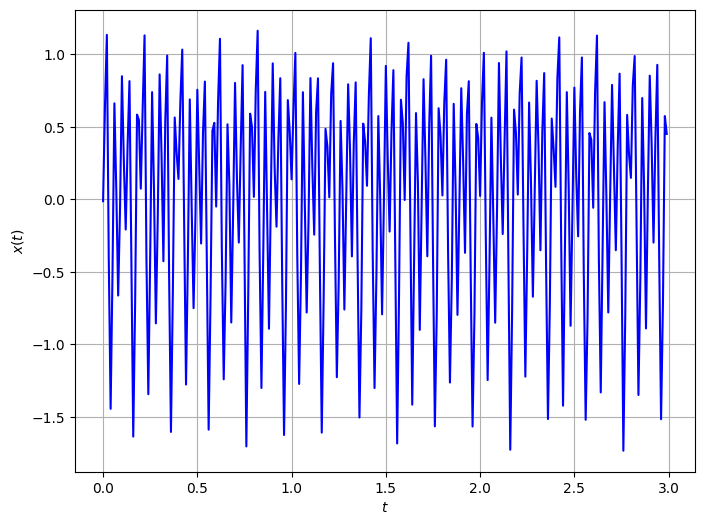

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t,x,'b-')
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.grid(True)

In [27]:
X = fft.fft(x)
f = fft.fftfreq(N,dt)

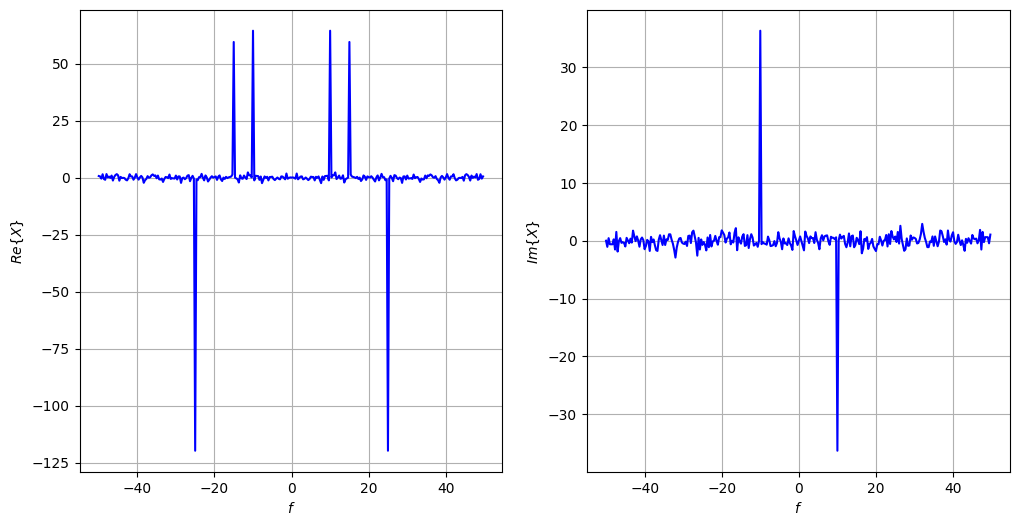

In [28]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(fft.fftshift(f),fft.fftshift(X).real,'b-')
ax[0].set_xlabel('$f$')
ax[0].set_ylabel('$Re\\{X\\}$')
ax[0].grid(True)
ax[1].plot(fft.fftshift(f),fft.fftshift(X).imag,'b-')
ax[1].set_xlabel('$f$')
ax[1].set_ylabel('$Im\\{X\\}$')
ax[1].grid(True)

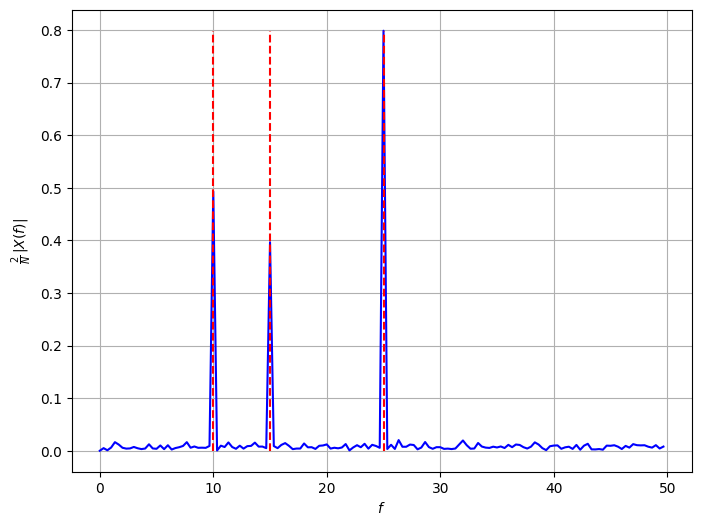

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
Xnorm = 2.0/N*np.abs(X[:N//2])
ax.plot(f[:N//2],Xnorm,'b-')
ax.set_xlabel('$f$')
ax.set_ylabel('$\\frac{2}{N}\\,|X(f)|$')
for fi_ in fi:
    ax.plot([fi_,fi_],[0,Xnorm.max()],'r--')
ax.grid(True)

## Parseval identity

Check that

$\sum_{k=0}^{N-1} |x_k|^2 = \sum_{k=0}^{N-1} |X_k|^2$

In [30]:
print(f"\u03a3 |x_\u2096| = {np.sum(x**2):7.3f}")
print(f"\u03a3 |X_\u2096| = {np.sum(np.abs(X)**2)/N:7.3f}")

Σ |x_ₖ| = 157.351
Σ |X_ₖ| = 157.351


## Filter

It is possible to implement a simple filter, for example a low-pass filter wich cuts away all the frequencies greater than 12 Hz.

In [31]:
X_fil = X*(np.abs(f)<12)
x_fil = fft.ifft(X_fil)

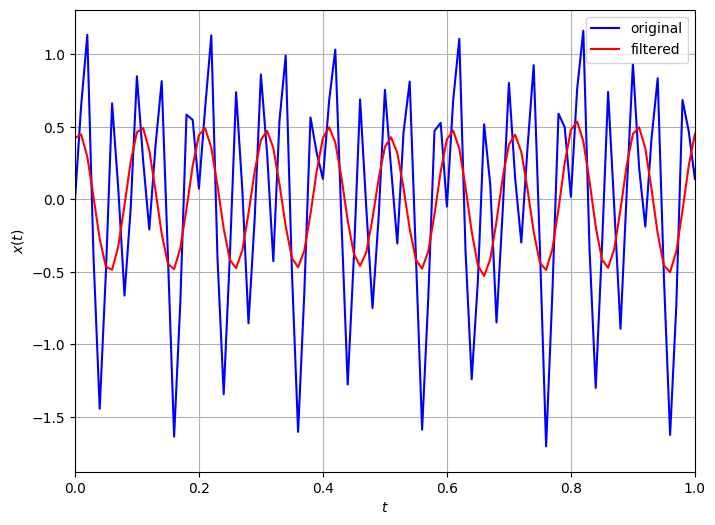

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t,x,'b-',label='original')
ax.plot(t,x_fil.real,'r-',label='filtered')
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.legend()
ax.set_xlim(0,1)
ax.grid(True)

## Windowing

Remember that, using FFT, we assume that the time serie is *periodic* with period T.

Since this is often not the case, this generates the *spectral leakage*.
To mitigate this phenomeno, it is possible to apply a windowing function, for example a Blackman window.

In [34]:
from scipy.signal.windows import blackman

w = blackman(N)
x_black = x*w
x_black = x_black-x_black.mean()
X_black = fft.fft(x_black)

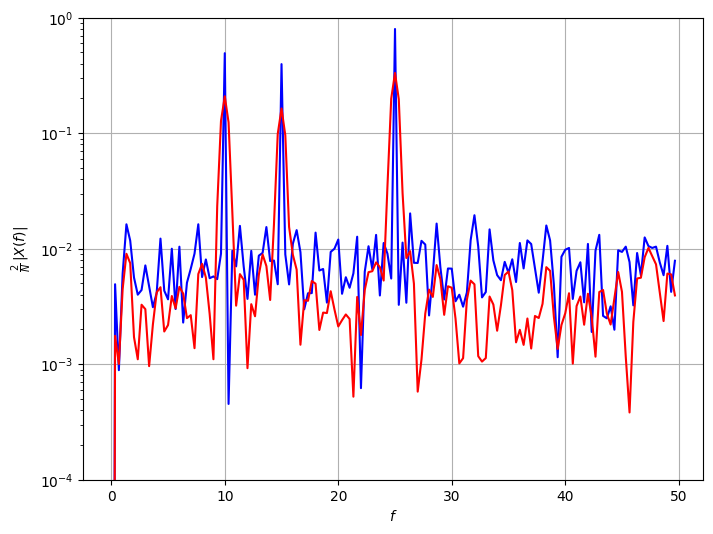

In [35]:
fig, ax = plt.subplots(figsize=(8,6))
X_black_norm = 2.0/N*np.abs(X_black[:N//2])
ax.semilogy(f[:N//2],Xnorm,'b-')
ax.semilogy(f[:N//2],X_black_norm,'r-')
ax.set_xlabel('$f$')
ax.set_ylabel('$\\frac{2}{N}\\,|X(f)|$')
ax.set_ylim(10**(-4),1)
ax.grid(True)

# Least squares

Can be useful if our data have and underlying law which depends *linearly* on some parameters, such as:

$$ y(x) = a + b\cdot x + c \cdot x^2$$

In [36]:
x = np.linspace(-1,1,100)
a, b, c = 1, 2, 3
y_exact = a + b*x + c*x**2

Add some noise...

In [37]:
m = 100
X = 1- 2*rd.rand(m)
Y = a + b*X + c*X**2 + rd.randn(m)

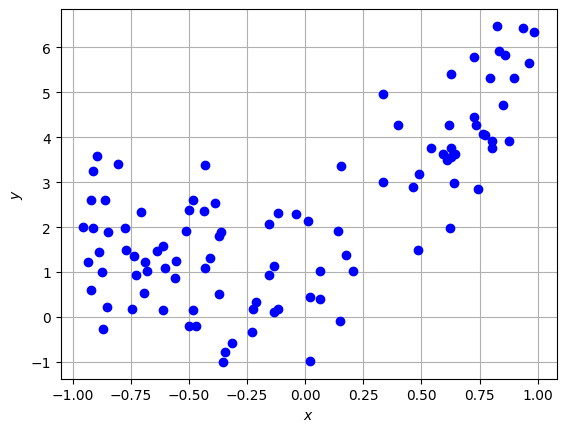

In [38]:
fig, ax = plt.subplots()
ax.plot(X,Y,'bo')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.grid(True)

The system to solve is this one:

$$\left[ \begin{array}{ccc} 1 & x_0 & x_0^2 \\ 1 & x_1 & x_1^2 \\ 1 & x_2 & x_2^2 \\ \ldots \\1 & x_m & x_m^2 \end{array} \right] \left( \begin{array}{c} a \\ b \\ c \end{array} \right) = \left( \begin{array}{c} y_0 \\ y_1 \\ y_2 \\ \ldots \\ y_m\end{array} \right) $$

In [39]:
A = np.vstack([X**0, X**1, X**2])
sol, r, rank, sv = linalg.lstsq(A.T, Y)

In [42]:
A.shape

(3, 100)

In [43]:
sol

array([1.24944518, 2.02692554, 2.98753101])

In [44]:
y_fit = sol[0] + sol[1]*x + sol[2]*x**2
y_exact = a + b*x + c*x**2

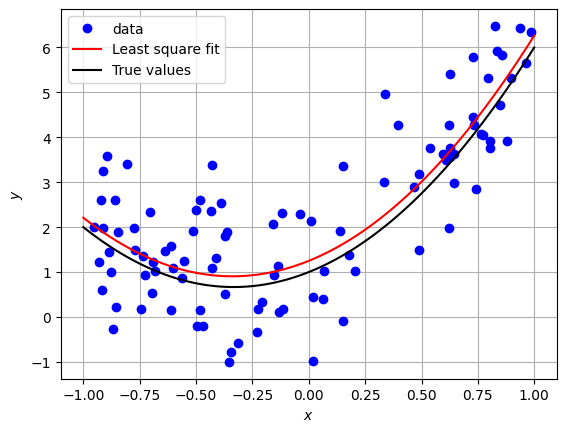

In [45]:
fig, ax = plt.subplots()
ax.plot(X,Y,'bo',label='data')
ax.plot(x, y_fit, 'r', label='Least square fit')
ax.plot(x, y_exact, 'k', label='True values')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(True)

# Zeros of functions

Find the zero (also named roots) of 

$$ f(x) = e^x -2$$

Note that 

$$ f'(x) = e^x$$

## Bisection method

The possible zeros is bracket by two points where the function has different sign.

In [46]:
f = lambda x: np.exp(x)-2
fprime = lambda x: np.exp(x)

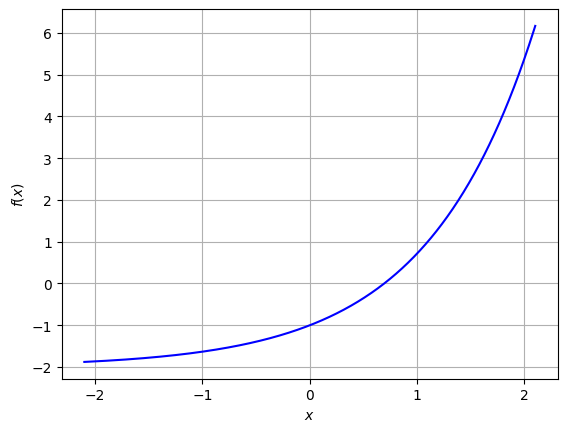

In [47]:
x = np.linspace(-2.1,2.1,1000)
fig, ax = plt.subplots()
ax.plot(x,f(x),'b-')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.grid(True)

We note that $f(0)$ and $f(1)$ differ in sign and so a zero must be between $0$ and $1$.

In [48]:
f(0)

-1.0

In [49]:
f(1)

0.7182818284590451

In [50]:
x_zero = optimize.bisect(f, 0, 1)
x_zero

0.6931471805601177

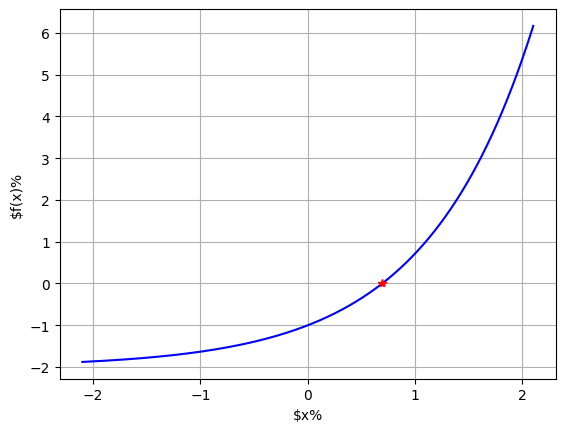

In [51]:
fig, ax = plt.subplots()
ax.plot(x,f(x),'b-')
ax.plot([x_zero],[f(x_zero)],'r*')
ax.set_xlabel('$x%')
ax.set_ylabel('$f(x)%')
ax.grid(True)

## Newton's method

Using a first-order Taylor expansion

$$ f(x+dx) = f(x) + f'(x) dx $$

and, starting from $x$, looking for $dx$ such that $f(x+dx)=0$ allows to **estimate** $dx$ as:

$$ dx = - \frac{f(x)}{f'(x)}$$

In [52]:
optimize.newton(f, 1, fprime=fprime)

0.6931471805599453

The prime derivative can be omitted (it is evaluated numerically)

In [53]:
optimize.newton(f, 1)

0.6931471805599453

## Brent's method

It is an *hybrid* method.

Requires bracketing points with sign change.

In [54]:
optimize.brentq(f, 0, 1)

0.6931471805599453

In [ ]:
%pdoc optimize.brentq

# Solving nonlinear system of equations

We have to solve this sytem

$$ \left\{ \begin{array}{l} y - x^3 -2 x^2 +1 = 0 \\
y + x^2 -1 =0 \end{array} \right.$$

Graphically...

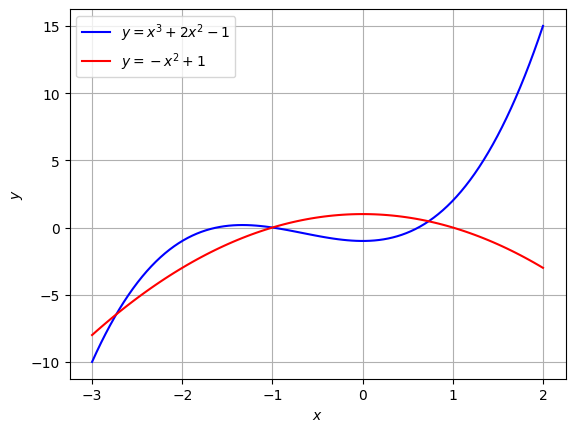

In [55]:
x = np.linspace(-3,2,100)
fig, ax = plt.subplots()
ax.plot(x,x**3+2*x**2-1,'b-', label='$y=x^3+2x^2-1$')
ax.plot(x,1-x**2,'r-',label='$y = -x^2+1$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend()
ax.grid(True)

We define a **vector** function in **two variables**: $f:\mathbb{R}^{2} \to \mathbb{R}^2$

$$ f(x) = \left[ \begin{array}{l} f_0(x_0, x_1) \\ f_1(x_0, x_1) \end{array} \right] = \left[ \begin{array}{l} x_1 - x_0^3 -2 x_0^2 +1  \\
x_1 + x_0^2 -1 \end{array} \right] $$

Note that $x_0 = x$ and $x_1=y$.

In [56]:
def f(x):
    return [x[1]-x[0]**3-2*x[0]**2+1, 
           x[1]+x[0]**2-1]

In [57]:
f((0,0))

[1, -1]

A *guess* value is needed, for example $x = \left[ 1, 0.5 \right]^T$

In [60]:
x_guess = [-2.5, -5.]
x_zero = optimize.fsolve(f, x_guess)
x_zero

array([-2.73205081, -6.46410162])

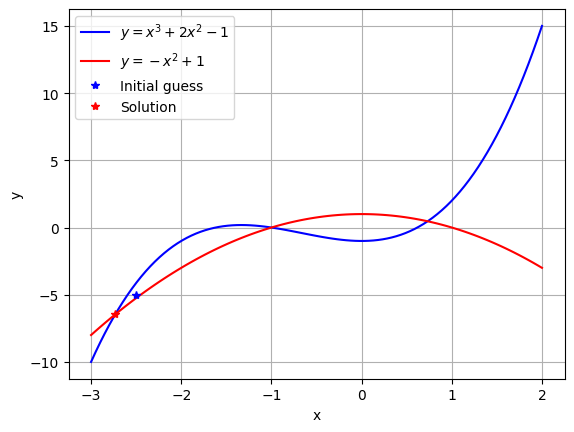

In [61]:
x = np.linspace(-3,2,100)
fig, ax = plt.subplots()
ax.plot(x,x**3+2*x**2-1,'b-', label='$y=x^3+2x^2-1$')
ax.plot(x,1-x**2,'r-',label='$y = -x^2+1$')
ax.plot([x_guess[0]],[x_guess[1]],'b*',label='Initial guess')
ax.plot([x_zero[0]],[x_zero[1]],'r*',label='Solution')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)

In [ ]:
%pdoc optimize.fsolve

# Integration

### Integration of a function, given its expression

$$\int_{-1}^{1} e^{-x^2} dx $$

In [62]:
f = lambda x: np.exp(-x**2)

In [63]:
integrate.quad(f, -1, 1)

(1.493648265624854, 1.6582826951881447e-14)

The first element of the tuple is the estimation of the integral, the second element an estimation of the **error**.

Sometimes the function has a singularity.

$$\int_{-1}^{+1} \frac{1}{\sqrt{|x|}} dx$$

In [64]:
f = lambda x: 1./np.sqrt(np.abs(x))

In [65]:
integrate.quad(f, -1, 1)

C:\Users\fclun\AppData\Local\Temp\ipykernel_12896\3175752530.py:1: RuntimeWarning: divide by zero encountered in scalar divide
  f = lambda x: 1./np.sqrt(np.abs(x))


(inf, inf)

Excluding the point with singulaity do the job.

In [66]:
integrate.quad(f, -1, 1, points=[0])

(3.9999999999999813, 5.684341886080802e-14)

In [67]:
f = lambda x: 1./np.sqrt(np.abs(x))**3

In [68]:
integrate.quad(f, -1, 1, points=[0])

C:\Users\fclun\AppData\Local\Temp\ipykernel_12896\323389860.py:1: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrate.quad(f, -1, 1, points=[0])


(-4.000000000000007, 2.8688162956314045e-13)

### Integration of a function, given a sample

In [70]:
f = lambda x: 1./np.sqrt(np.abs(x))

In [73]:
x = np.linspace(-1,1,200)
y = f(x)

In [74]:
(np.sum(y[1:-1])+0.5*y[0]+0.5*y[-1])*(x[1]-x[0])

3.8787082658197614

Using the trapezoidal rule (linear interpolation)

In [75]:
integrate.trapezoid(y, x=x)

3.8787082658197445

Using the Simpson's rule (quadratic interpolation)

In [78]:
integrate.simpson(y, x=x)

3.8787166820241987

In [ ]:
%pdoc integrate.trapezoid

# Optimization

## Univariate Optimization

Problem: minimize the area of a cylinder with unit volume.

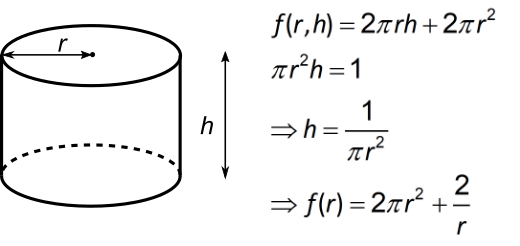

In [79]:
f = lambda r: 2*np.pi*r**2+2/r

# def f(r):
#      return 2*np.pi*r**2+2/r

We'll use Brent's methd, so we need bracketing values:

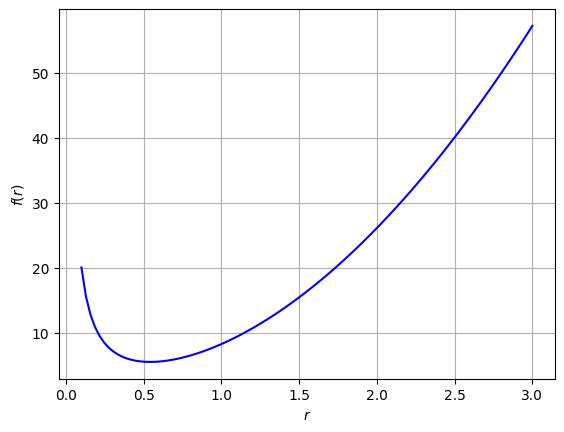

In [80]:
r = np.linspace(0.1,3,101)
fig, ax = plt.subplots()
ax.plot(r,f(r),'b-')
ax.set_xlabel('$r$')
ax.set_ylabel('$f(r)$')
plt.grid(True)

Note that we use `brent` method to fine **minima** (info [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brent.html)), while we use `brentq` to find the **roots**.

In [81]:
r_min = optimize.brent(f,brack=(0.1,1))
print(f"Minimum equal to {f(r_min):8.3f} at r={r_min:8.3f}")

Minimum equal to    5.536 at r=   0.542


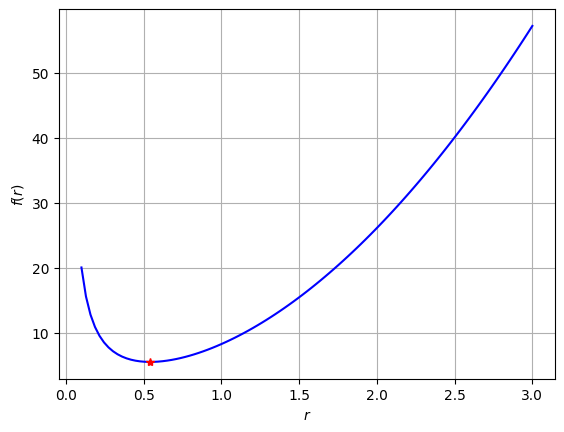

In [82]:
r = np.linspace(0.1,3,101)
fig, ax = plt.subplots()
ax.plot(r,f(r),'b-')
ax.plot([r_min],[f(r_min)],'r*')
ax.set_xlabel('$r$')
ax.set_ylabel('$f(r)$')
plt.grid(True)

## Unconstrained Multivariate Optimization

Find the minimum of:

$$f(x_0, x_1) = (x_0-1)^4 +5(x_1-1)^2 - 2x_0x_1$$

The gradient is:

$$ \nabla f = \left[ \begin{array}{c} -2 x_1 + 4(x_0-1)^3 \\ -2x_0 + 10 x_1 -10 \end{array}\right]$$

The Hessian is:

$$ H(f)  = \left[ \begin{array}{cc} 12(x_0-1)^2 & -2 \\ -2 & 10  \end{array} \right]$$

In [83]:
def f(x):
    return (x[0]-1)**4 +5*(x[1]-1)**2 - 2*x[0]*x[1]

In [84]:
def fprime(x):
    return [-2*x[1]+4*(x[0]-1)**3, -2*x[0]+10*x[1]-10]

In [85]:
def fhess(x):
    return [[12*(x[0]-1)**2,-2],[-2,10]]

We use `fmin_ncg` which implement Newton's method, info [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_ncg.html).
Note that the we need an initial guess.

In [86]:
x_ini = [0.,0.]
x_opt = optimize.fmin_ncg(f, x_ini, fprime=fprime, fhess=fhess)
x_opt

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
         Hessian evaluations: 8


array([1.88292613, 1.37658523])

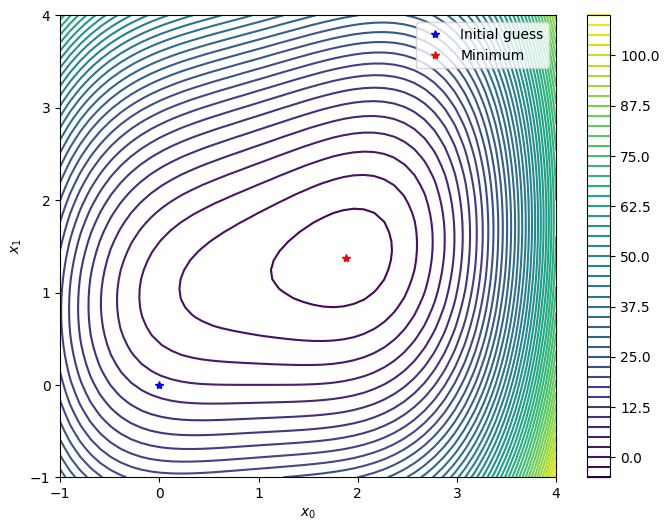

In [87]:
fig, ax = plt.subplots(figsize=(8,6))
X, Y = np.meshgrid(np.linspace(-1,4),np.linspace(-1,4))
Z = [f([x_,y_]) for (x_, y_) in zip(X,Y)]

plt.set_cmap('viridis') # for info, https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
c = ax.contour(X,Y,Z,50)
plt.colorbar(c,ax=ax)
ax.plot([x_ini[0]],[x_ini[1]],'b*', label='Initial guess')
ax.plot([x_opt[0]],[x_opt[1]],'r*', label='Minimum')
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.legend()
ax.grid(False)

If it is not possible to give values for the  gradient and/or the hessian, we can use  `fmin_bfgs` (a quasi-Newton method which estimates numerically the gradient and the Hessian, see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_bfgs.html)) or `fmin_cg` (a variant of the steepest descent method, see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_cg.html)). In both methods we need an initial guess.

In [88]:
optimize.fmin_bfgs(f, (0,0))

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 39
         Gradient evaluations: 13


array([1.88292645, 1.37658596])

In [89]:
optimize.fmin_cg(f, (0,0))

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 54
         Gradient evaluations: 18


array([1.88292612, 1.37658522])

Sometimes, the fucntion has several local minima, so it is sifficult to chosse an appropriate initial guess, i.e. one for which a *global*, and non *local* minimum is found.

For example

$f(x_0, x_1) = \left(4 \sin(\pi \, x_0) + 6 \sin(\pi \, x_1) \right) + (x_0-1)^2+(x_1-1)^2$

In [90]:
def f(x):
    return (4*np.sin(np.pi*x[0])+6*np.sin(np.pi*x[1]))+(x[0]-1)**2+(x[1]-1)**2

In [91]:
x_ini = [-1., -2.]
x_opt, x_iter = optimize.fmin_bfgs(f, x_ini, retall=True)
x_opt

Optimization terminated successfully.
         Current function value: -3.813108
         Iterations: 7
         Function evaluations: 36
         Gradient evaluations: 12


array([3.37653057, 1.48365789])

In [92]:
x_iter

[array([-1., -2.]),
 array([-0.20192855, -2.61901694]),
 array([3.39678895, 1.40997535]),
 array([3.43285399, 1.44661263]),
 array([3.39600756, 1.47137165]),
 array([3.3770438 , 1.48372727]),
 array([3.37653553, 1.48365707]),
 array([3.37653057, 1.48365789])]

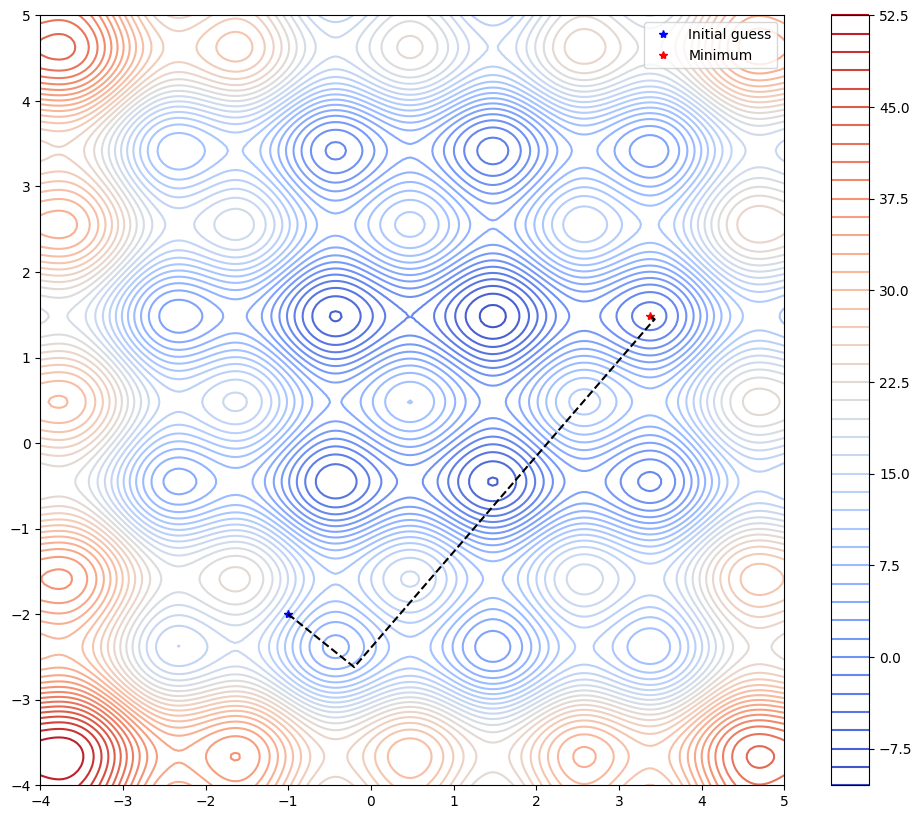

In [93]:
fig, ax = plt.subplots(figsize=(12,10))
X, Y = np.meshgrid(np.linspace(-4,5,200),np.linspace(-4,5, 200))
Z = [f([x_,y_]) for (x_, y_) in zip(X,Y)]

plt.set_cmap('coolwarm') # for info, https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
c = ax.contour(X,Y,Z,50)
plt.colorbar(c,ax=ax)
ax.plot([x_ini[0]],[x_ini[1]],'b*', label='Initial guess')
ax.plot([x_opt[0]],[x_opt[1]],'r*', label='Minimum')
# ---
x_iter = np.array(x_iter)
ax.plot(x_iter[:,0],x_iter[:,1],'k--')
# ---
ax.legend()
ax.grid(False)

Evaluate the function in $x = [3.37653057, 1.48365789]$ and in $x = [-0.5,1.5]$ to verify we did not found the global minimum.

In [94]:
print(f(x_opt))
print(f([-.5,1.5]))

-3.8131075692684817
-7.5


In this case a *brute force approach* can be usefull in order to find an estimate of a global minimum.

In [95]:
x_ini = optimize.brute(f, (slice(-3,5,0.5), slice(-3,4,0.5)), finish=None)
x_ini

array([1.5, 1.5])

In [96]:
x_opt = optimize.fmin_bfgs(f, x_ini)
x_opt

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 7


array([1.47586906, 1.48365787])

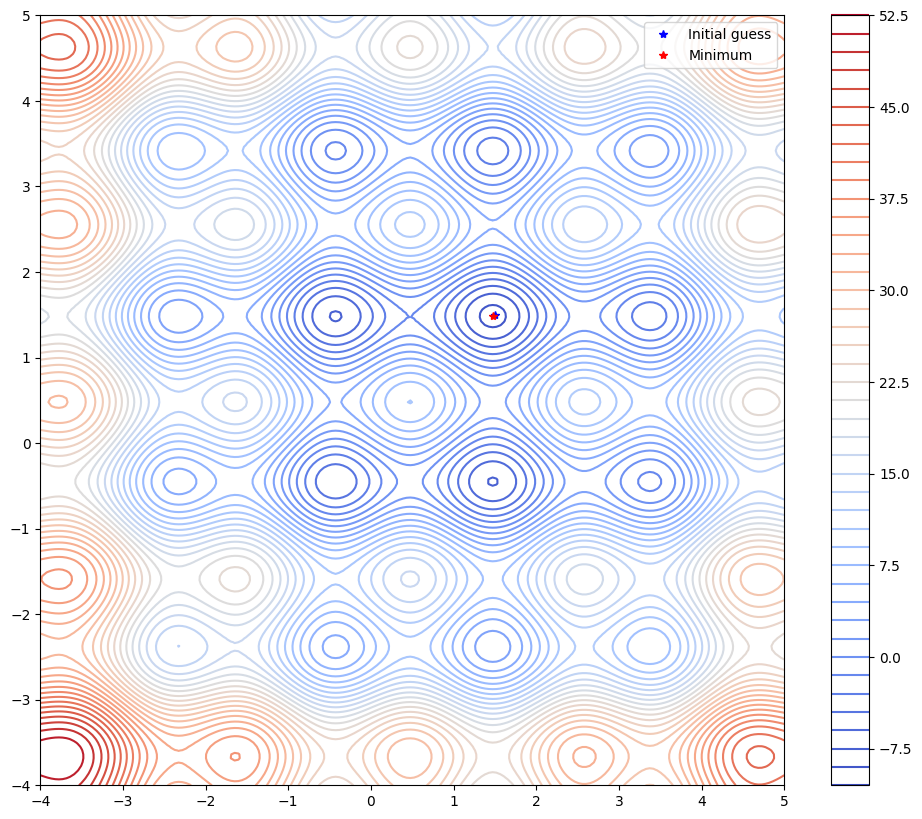

In [97]:
fig, ax = plt.subplots(figsize=(12,10))
X, Y = np.meshgrid(np.linspace(-4,5,200),np.linspace(-4,5, 200))
Z = [f([x_,y_]) for (x_, y_) in zip(X,Y)]

c = ax.contour(X,Y,Z,50)
plt.colorbar(c,ax=ax)
ax.plot([x_ini[0]],[x_ini[1]],'b*', label='Initial guess')
ax.plot([x_opt[0]],[x_opt[1]],'r*', label='Minimum')
ax.legend()
ax.grid(False)

Instead of using directly the methods in  `optimize`, we can use a general interface,  `minimize`, selecting the method as an argument.

In [98]:
result = optimize.minimize(f, x_ini, method='BFGS')
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -9.520229273055016
        x: [ 1.476e+00  1.484e+00]
      nit: 4
      jac: [-7.153e-07 -8.345e-07]
 hess_inv: [[ 2.416e-02  4.605e-06]
            [ 4.605e-06  1.635e-02]]
     nfev: 21
     njev: 7

Note that in this case the optimal point is in attribute `x`!

In [99]:
result.x

array([1.47586906, 1.48365787])

# Nonlinear least square problems

We saw least square approximation, but if the law undelying our data depends *nonlinearly* on some parameters, such as

$$ f(x) = b_0 + b_1 e^{-b_2\,x}$$

we have to use a different approach.

In [100]:
def f(x, b0, b1, b2):
    return b0 + b1*np.exp(-b2*x)

In [101]:
xdata = np.linspace(0,5,50)
b = (0.25, 0.75, 0.5)
ydata = f(xdata, *b)
ydata = ydata + 0.05*rd.randn(len(xdata))

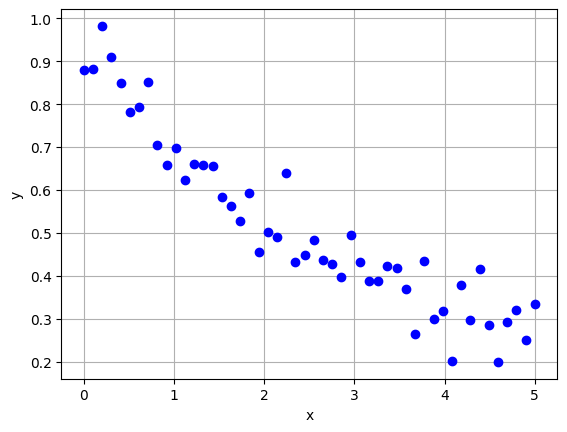

In [102]:
fig, ax = plt.subplots()
ax.plot(xdata, ydata,'bo')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

Define the fucntion difference between the data and the law given the values of parameters

In [103]:
def g(b):
    return ydata - f(xdata, *b)

We use `leastsq` in order to estimate the parameters $b_0, b_1, b_2$.

In [104]:
b_ini = (1,1,1)
b_opt, b_cov = optimize.leastsq(g, b_ini)
b_opt

array([0.16239037, 0.78626969, 0.38110881])

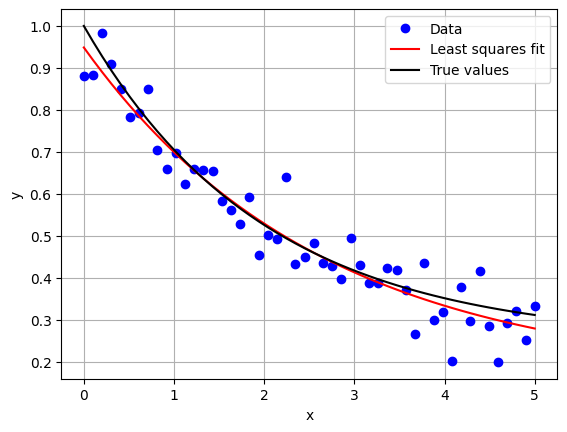

In [105]:
fig, ax = plt.subplots()
ax.plot(xdata, ydata,'bo', label='Data')
ax.plot(xdata, f(xdata, *b_opt),'r-', label='Least squares fit')
ax.plot(xdata, f(xdata, *b),'k-', label='True values')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)

There is as specific tool to fit the values of parameters *without* having to define the difference function: `curve_fit` (see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)).

In [106]:
b_opt, b_cov = optimize.curve_fit(f, xdata, ydata, b_ini)
b_opt

array([0.16239037, 0.78626969, 0.38110881])

# Constrained optimization

The variables can be subjected to bounds or constraints.

Find the minimum of

$$f(x_0, x_1) = (x_0 -1)^2 + (x_1-1)^2$$

with the following bound on $x$:

$$x_0 \in [2, 3],\quad x_1 \in [0, 2]$$

In [107]:
def f(x):
    return (x[0]-1)**2 + (x[1]-1)**2

The corresponding *unconstrained* optimization problem gives:

In [108]:
x_ini = [2.5,1]
x_opt = optimize.minimize(f, x_ini, method='BFGS')
x_opt

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.071276463850941e-16
        x: [ 1.000e+00  1.000e+00]
      nit: 2
      jac: [ 6.565e-09 -2.936e-08]
 hess_inv: [[ 5.000e-01  7.377e-09]
            [ 7.377e-09  1.000e+00]]
     nfev: 9
     njev: 3

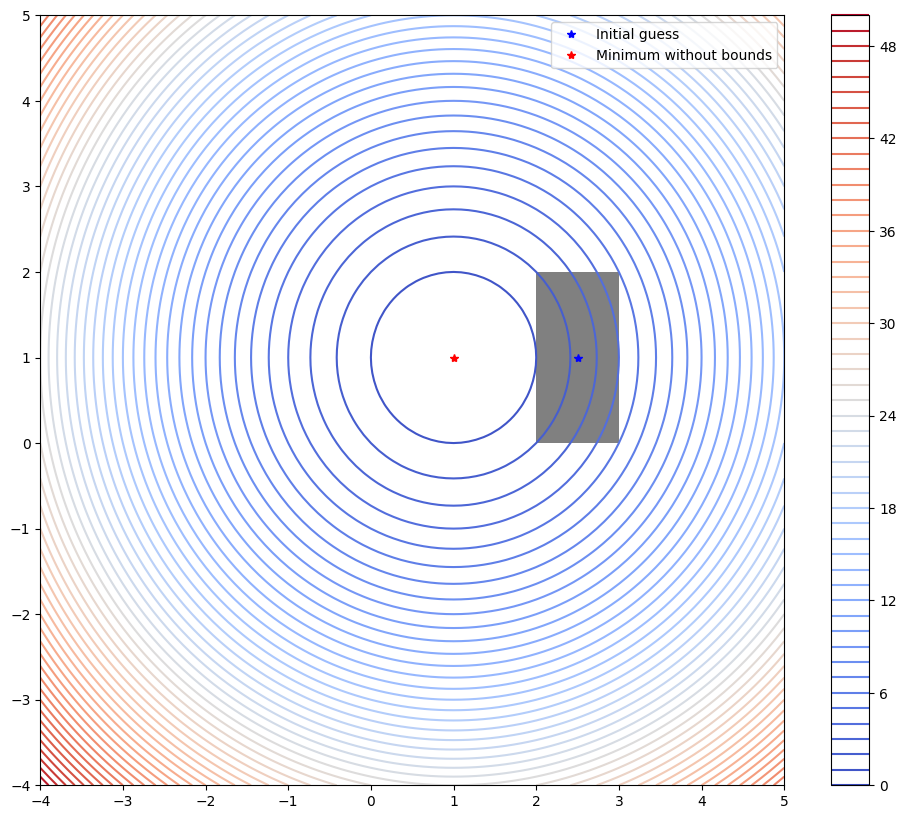

In [109]:
fig, ax = plt.subplots(figsize=(12,10))
X, Y = np.meshgrid(np.linspace(-4,5,100),np.linspace(-4,5,100))
Z = [f([x_,y_]) for (x_, y_) in zip(X,Y)]

c = ax.contour(X,Y,Z,50)
plt.colorbar(c,ax=ax)

ax.plot(x_ini[0],x_ini[1],'b*', label='Initial guess')
ax.plot(x_opt.x[0],x_opt.x[1],'r*', label='Minimum without bounds')

bound_rect = plt.Rectangle((2,0),1,2,facecolor="grey")
ax.add_patch(bound_rect)
ax.legend()
ax.grid(False)

The value of $x_0$ for the miminum is outside the bounds.

One method for constrained optimization is `L-BFGS-B` (see [here](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html)), which requires the bounds of the variables.

In [110]:
x_cons_opt = optimize.minimize(f, [1,1], method='L-BFGS-B', bounds=[(2,3),(0,2)])
x_cons_opt.x

array([2., 1.])

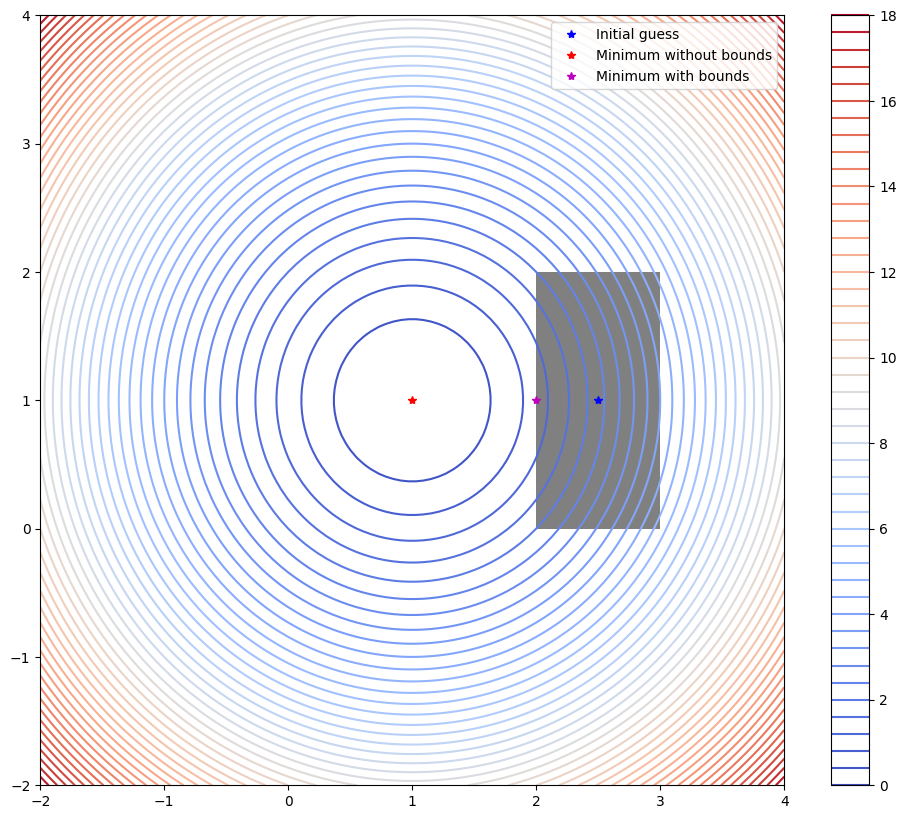

In [111]:
fig, ax = plt.subplots(figsize=(12,10))
X, Y = np.meshgrid(np.linspace(-2,4,100),np.linspace(-2,4,100))
Z = [f([x_,y_]) for (x_, y_) in zip(X,Y)]

c = ax.contour(X,Y,Z,50)
plt.colorbar(c,ax=ax)

ax.plot(x_ini[0],x_ini[1],'b*', label='Initial guess')
ax.plot(x_opt.x[0],x_opt.x[1],'r*', label='Minimum without bounds')
ax.plot(x_cons_opt.x[0],x_cons_opt.x[1],'m*', label='Minimum with bounds')

bound_rect = plt.Rectangle((2,0),1,2,facecolor="grey")
ax.add_patch(bound_rect)
ax.legend()
ax.grid(False)

Slighlty different is the case of problem with *constraints*.

Find the mimimum of

$$f(x_0, x_1) = (x_0 -1)^2 + (x_1-1)^2$$

such that

$$g(x) = x_1 - 1.75 - (x_0-0.75)^4 \ge 0$$

In [112]:
def g(x):
    return x[1] - 1.75 - (x[0]-0.75)**4

The constraints are given by a list of dictionaries, where the first value (with key "type") is the type of constarint(equality, inequality) and the second value (with key "fun") is the function defining the constraint. 
The inequality is always "not less than" type.

In [113]:
constraints = [dict(type='ineq', fun=g)]

The method used is`SLSQP` (see [here](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-slsqp.html)).

In [114]:
x_ini = [1,2]
x_cons_opt = optimize.minimize(f, x_ini, method='SLSQP', constraints=constraints)
x_cons_opt

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.5669164004155391
       x: [ 9.686e-01  1.752e+00]
     nit: 5
     jac: [-6.289e-02  1.505e+00]
    nfev: 16
    njev: 5

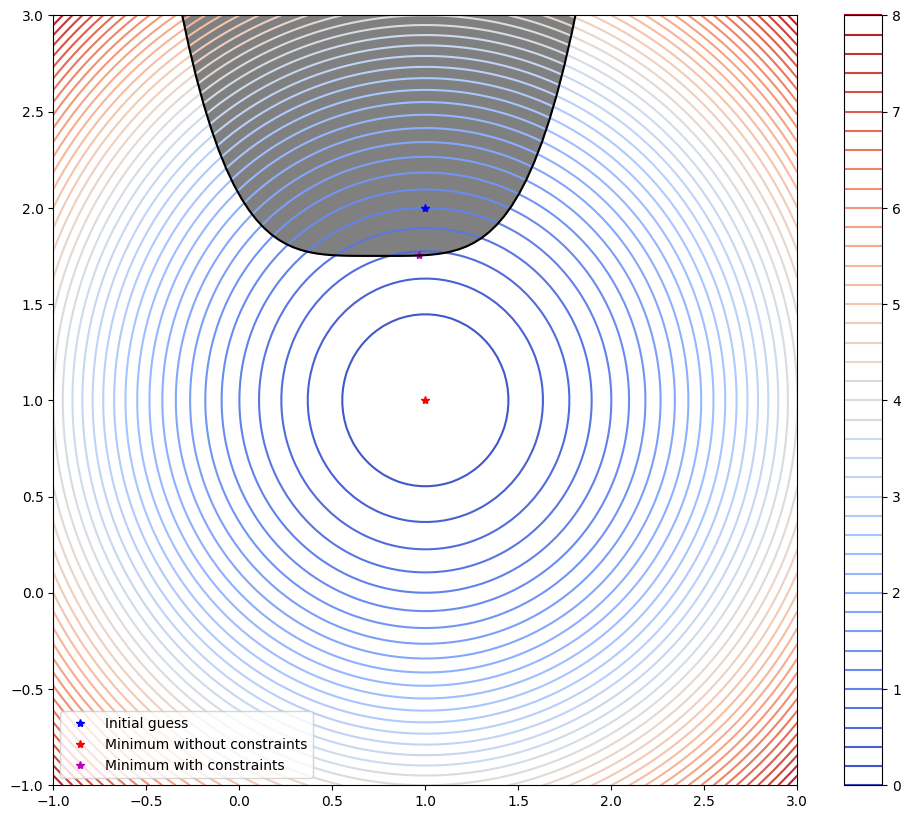

In [115]:
fig, ax = plt.subplots(figsize=(12,10))
X, Y = np.meshgrid(np.linspace(-1,3,100),np.linspace(-1,3,100))
Z = [f([x_,y_]) for (x_, y_) in zip(X,Y)]

c = ax.contour(X,Y,Z,50)
plt.colorbar(c,ax=ax)

ax.plot(x_ini[0],x_ini[1],'b*', label='Initial guess')
ax.plot(x_opt.x[0],x_opt.x[1],'r*', label='Minimum without constraints')
ax.plot(x_cons_opt.x[0],x_cons_opt.x[1],'m*', label='Minimum with constraints')

x = np.linspace(-1,3,100)
ax.plot(x, 1.75 + (x-0.75)**4, 'k-')
ax.fill_between(x, 1.75 + (x-0.75)**4, 3, color="grey")

ax.set_xlim([-1,3])
ax.set_ylim([-1,3])
ax.legend()
ax.grid(False)

# Linear programming

If both the function to minimize and the constraints are **linear**, we have a *linear programming* problem.

Minimize

$$f(x) = -x_0 + 2x_1 -3x_2$$

with the following constraints

$$x_0+x_1 \le 1$$
$$-x_0+3x_1 \le 2$$
$$-x_1 + x_2 \le 3$$

In this case, the problem and the constraints can be recast in matrix form.

Minimize

$$f(x) = c^T x$$

with the following constraints:
$$A x \le b$$

where

$$ x = \left[ \begin{array}{r}x_0\\x_1\\x_2\end{array}\right], c = \left[ \begin{array}{r}-1\\2\\-3\end{array}\right], 
 A = \left[ \begin{array}{ccc} 1 & 1 & 0 \\ -1 & 3 & 0 \\ 0 & -1 & 1 \end{array}\right], b = \left[ \begin{array}{r}1 \\ 2 \\ 3 \end{array}\right]$$

In [116]:
c = np.array([-1,2,-3])
A = np.array([[1,1,0],[-1,3,0],[0,-1,1]])
b = np.array([1,2,3])

The method used is`linprog` (see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html)), which implement a variation of the (classical) simplex method.

In [117]:
sol = optimize.linprog(c,A,b,method='revised simplex')
sol

C:\Users\fclun\AppData\Local\Temp\ipykernel_12896\1235729887.py:1: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  sol = optimize.linprog(c,A,b,method='revised simplex')


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -10.0
       x: [ 1.000e+00  0.000e+00  3.000e+00]
     nit: 2

In [118]:
sol = optimize.linprog(c,A,b,method='highs') # sol = optimize.linprog(c,A,b,method='revised simplex')
sol

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -10.0
              x: [ 1.000e+00  0.000e+00  3.000e+00]
            nit: 0
          lower:  residual: [ 1.000e+00  0.000e+00  3.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  3.000e+00  0.000e+00]
                 marginals: [-1.000e+00 -0.000e+00 -3.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0